In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# data from https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

In [2]:
train_df=pd.read_csv('./data/train.csv',low_memory=False)
# train column
# ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
#        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
#        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
#        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
#        'Credit_Utilization_Ratio', 'Credit_History_Age',
#        'Payment_of_Min_Amount', 'Total_EMI_per_month',
#        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
#        'Credit_Score']
# 'Credit_Score' in 3 class: Good, Standard, Poor.
test_df=pd.read_csv('./data/test.csv',low_memory=False)
# test column
# ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
#        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
#        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
#        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
#        'Credit_Utilization_Ratio', 'Credit_History_Age',
#        'Payment_of_Min_Amount', 'Total_EMI_per_month',
#        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

# data we need to use
# ['Annual_Income','Age','Occupation(one-hot encoding)','Annual_Income',
# 'Interest_Rate','Num_of_Delayd_Payment','Num_Credit_inquiries','Credit_Mix',
# 'Outstanding_Debt','Amount_invested_monthly']

train_df_back=train_df.copy()
test_df_back=test_df.copy()

In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [4]:
train_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
# drop datapoint containing any nan and split the data according to credit score.
train_df=train_df.dropna(how='any')
good_df=train_df[train_df['Credit_Score']=='Good']
standard_df=train_df[train_df['Credit_Score']=='Standard']
poor_df=train_df[train_df['Credit_Score']=='Poor']

In [6]:
# proper_age=train_df[train_df['Age'].str.len()==2]
# 
# annual_income=train_df[(train_df['Credit_Score']=='Good')]
annual_income=train_df[~train_df['Annual_Income'].str.contains('_')]
annual_income['Annual_Income']=pd.to_numeric(annual_income['Annual_Income'])


C:\Users\cheng\AppData\Local\Temp\ipykernel_42604\3263832630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_income['Annual_Income']=pd.to_numeric(annual_income['Annual_Income'])


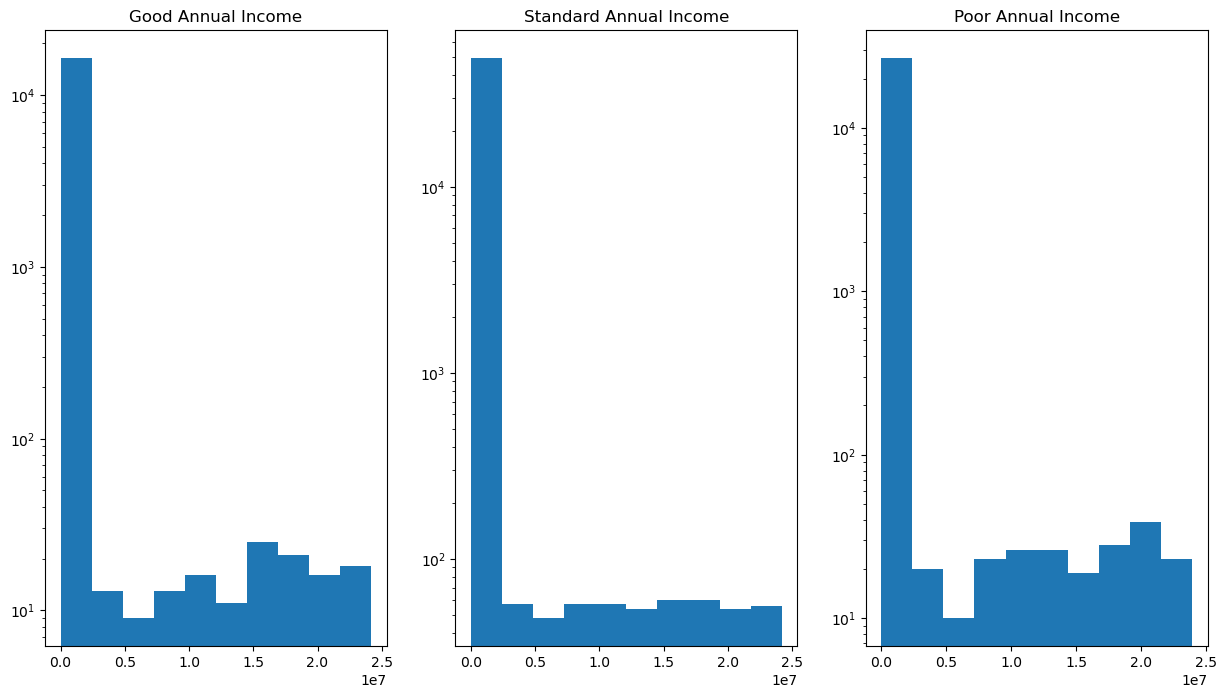

In [7]:
fig,ax=plt.subplots(1,3,figsize=(15,8))
ax[0].hist(annual_income[annual_income['Credit_Score']=='Good']['Annual_Income'],log=True)
ax[0].title.set_text('Good Annual Income')
ax[1].hist(annual_income[annual_income['Credit_Score']=='Standard']['Annual_Income'],log=True)
ax[1].title.set_text('Standard Annual Income')
ax[2].hist(annual_income[annual_income['Credit_Score']=='Poor']['Annual_Income'],log=True)
ax[2].title.set_text('Poor Annual Income')


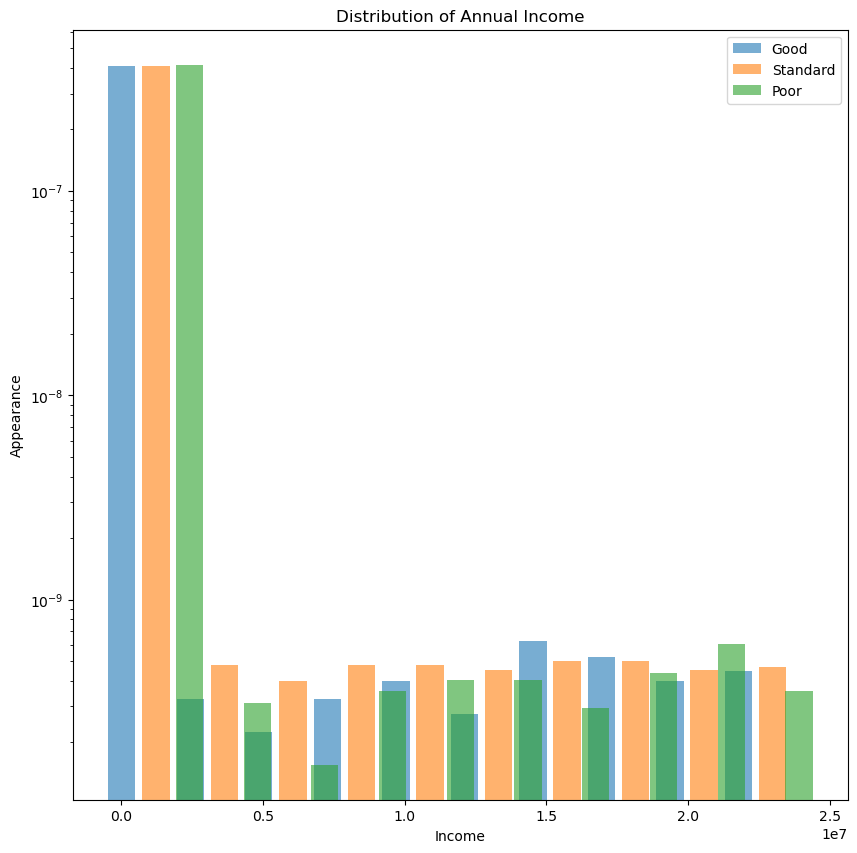

In [45]:
fig=plt.figure(figsize=(10,10))
plt.hist(annual_income[annual_income['Credit_Score']=='Good']['Annual_Income'],log=True,label='Good',stacked=False,align='left',density=True,rwidth=0.4,alpha=0.6)
plt.hist(annual_income[annual_income['Credit_Score']=='Standard']['Annual_Income'],log=True,label='Standard',stacked=False,align='mid',density=True,rwidth=0.4,alpha=0.6)
plt.hist(annual_income[annual_income['Credit_Score']=='Poor']['Annual_Income'],log=True,label='Poor',stacked=False,align='right',density=True,rwidth=0.4,alpha=0.6)
plt.legend(loc='upper right')
plt.xlabel('Income')
plt.ylabel('Appearance')
plt.title('Distribution of Annual Income')
plt.show()

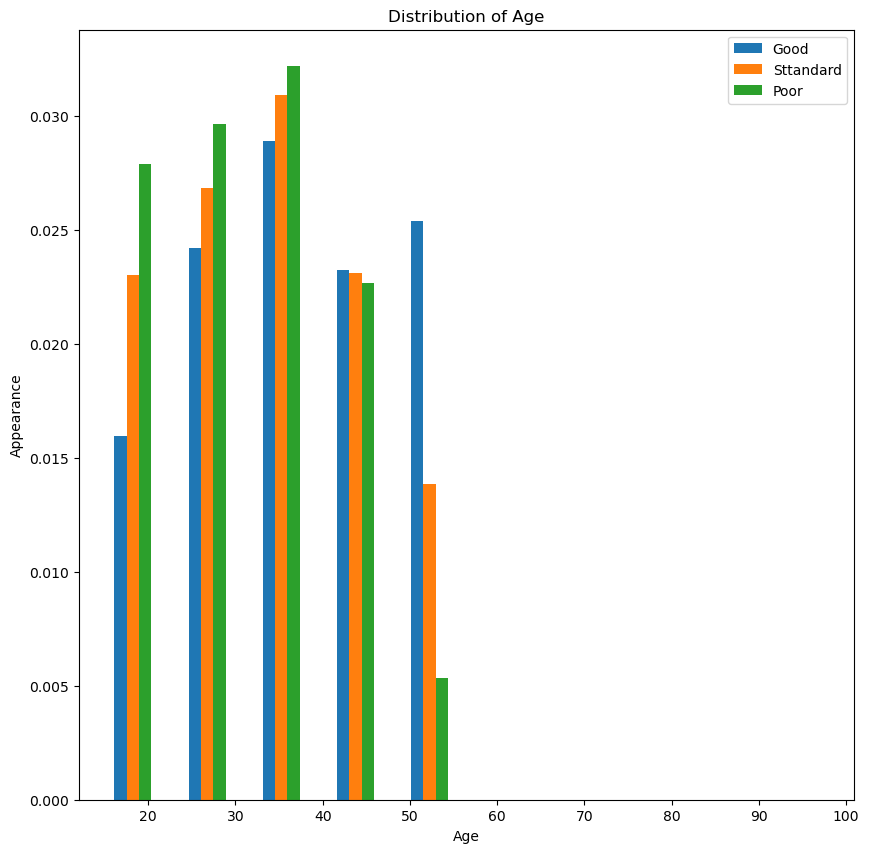

In [63]:
age=train_df[train_df['Age'].str.len()==2]
fig=plt.figure(figsize=(10,10))
bin=10#np.arange(20,110,10)
x=pd.to_numeric(age[age['Credit_Score']=='Good']['Age'])
y=pd.to_numeric(age[age['Credit_Score']=='Standard']['Age'])
z=pd.to_numeric(age[age['Credit_Score']=='Poor']['Age'])

plt.hist([x,y,z],label=['Good','Standard','Poor'],bins=bin,stacked=False,align='mid',density=True,rwidth=0.5)


# ghist, gbins=np.histogram(age[age['Credit_Score']=='Good']['Age'],bins=10)
# shist, sbins=np.histogram(age[age['Credit_Score']=='Standard']['Age'],bins=10)
# phist, pbins=np.histogram(age[age['Credit_Score']=='Poor']['Age'],bins=10)
# fig=plt.figure()
# ax=fig.add_subplot(111)
# w=(gbins[1]-gbins[0])/4.
# ax.bar(gbins[:-1]-w/3., ghist,width=w, color='r',label='Good')
# ax.bar(sbins[:-1],shist,width=w, color='orange',label='Standard')
# ax.bar(pbins[:-1]+w/3., phist, width=w, color='blue',label='Poor')


plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Appearance')
plt.title('Distribution of Age')
plt.show()

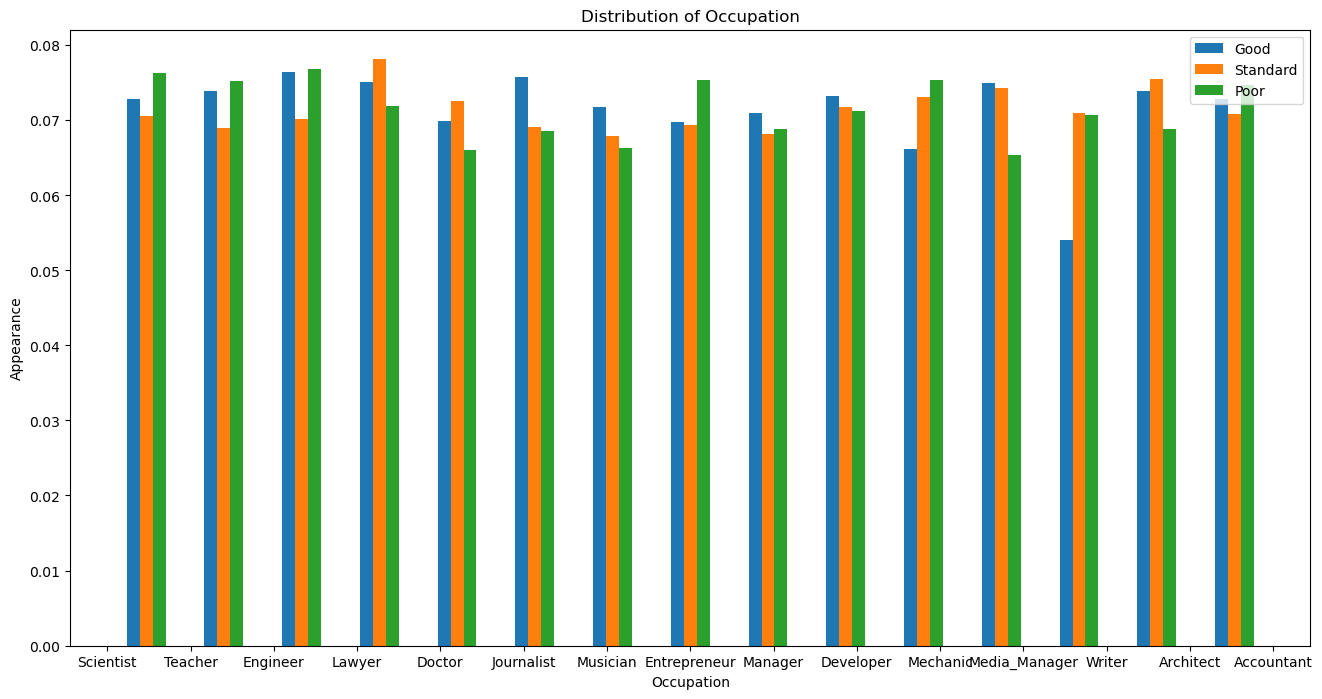

In [112]:
Occupation=train_df[~ (train_df['Occupation']=='_______')]
# print(train_df['Occupation']=='_______')

fig=plt.figure(figsize=(16,8))
x=Occupation[Occupation['Credit_Score']=='Good']['Occupation']
y=Occupation[Occupation['Credit_Score']=='Standard']['Occupation']
z=Occupation[Occupation['Credit_Score']=='Poor']['Occupation']

plt.hist([x,y,z],label=['Good','Standard','Poor'],stacked=False,bins=15,density=True,rwidth=0.5)

plt.legend(loc='upper right')
plt.xlabel('Occupation')
plt.ylabel('Appearance')
plt.title('Distribution of Occupation')
plt.show()

C:\Users\cheng\AppData\Local\Temp\ipykernel_42604\379669924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Occupation[Occupation['Occupation']==occupation_list[i]]['Occupation']=i


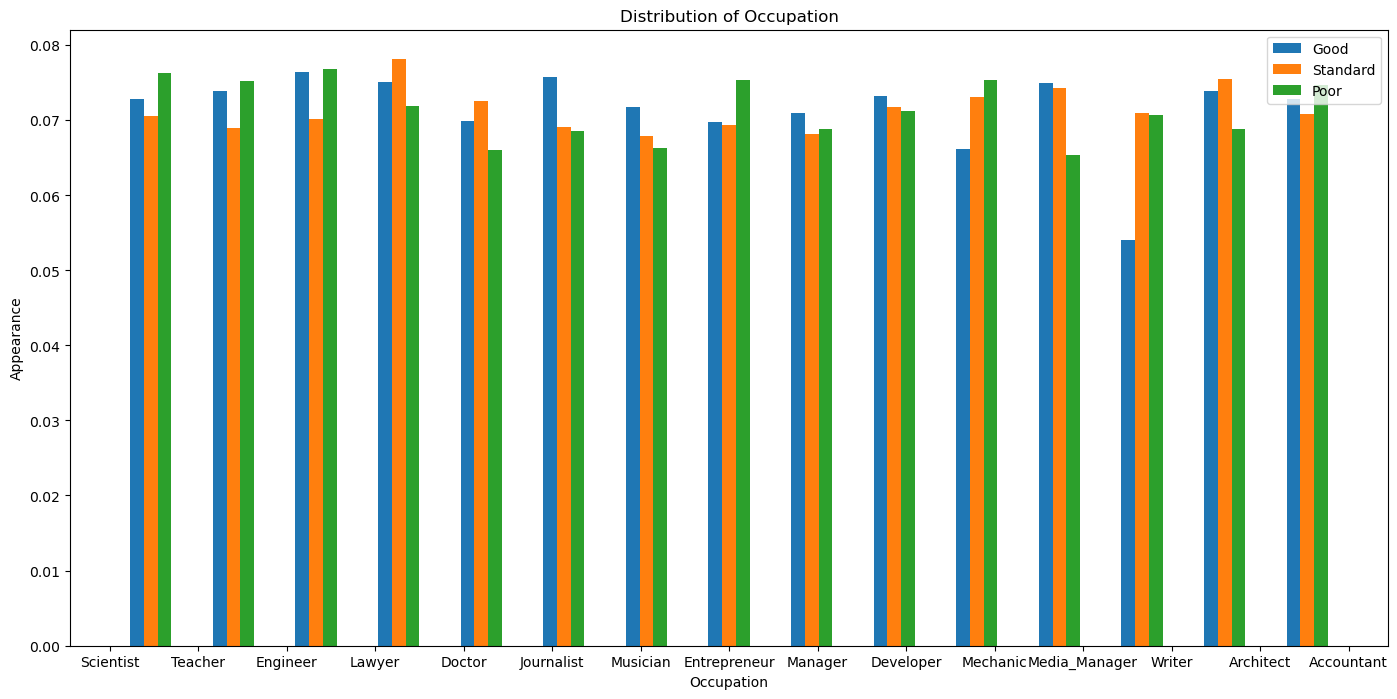

In [118]:
occupation_list=['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']

#one-hot encoding
for i in range(len(occupation_list)):
    Occupation[Occupation['Occupation']==occupation_list[i]]['Occupation']=i


fig=plt.figure(figsize=(17,8))
x=Occupation[Occupation['Credit_Score']=='Good']['Occupation']
y=Occupation[Occupation['Credit_Score']=='Standard']['Occupation']
z=Occupation[Occupation['Credit_Score']=='Poor']['Occupation']


plt.hist([x,y,z],label=['Good','Standard','Poor'],stacked=False,bins=15,density=True,rwidth=0.5)

plt.legend(loc='upper right')
plt.xlabel('Occupation')
plt.ylabel('Appearance')
plt.title('Distribution of Occupation')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Delayed Payment and Outstanding Debt')

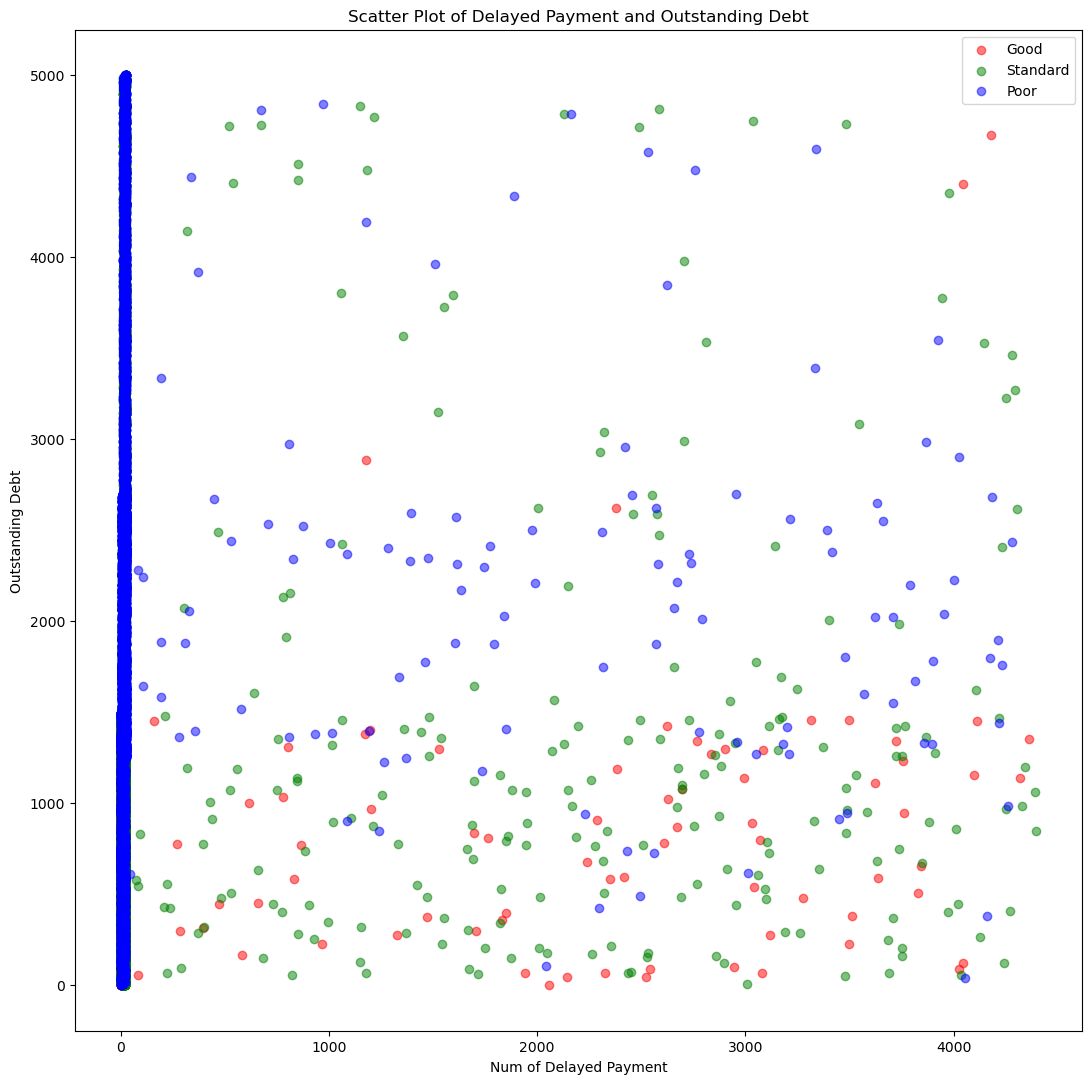

In [133]:
#between num_delay and outstanding debt
data=train_df.dropna(how='any')
data=data[~data['Num_of_Delayed_Payment'].str.contains('_')]
data=data[~data['Num_of_Delayed_Payment'].str.contains('-')]
data['Num_of_Delayed_Payment']=pd.to_numeric(data['Num_of_Delayed_Payment'])
data=data[~data['Outstanding_Debt'].str.contains('_')]
data['Outstanding_Debt']=pd.to_numeric(data['Outstanding_Debt'])

x1=data[data['Credit_Score']=='Good']['Num_of_Delayed_Payment']
y1=data[data['Credit_Score']=='Good']['Outstanding_Debt']

x2=data[data['Credit_Score']=='Standard']['Num_of_Delayed_Payment']
y2=data[data['Credit_Score']=='Standard']['Outstanding_Debt']

x3=data[data['Credit_Score']=='Poor']['Num_of_Delayed_Payment']
y3=data[data['Credit_Score']=='Poor']['Outstanding_Debt']

fig=plt.figure(figsize=(13,13))
#plt.scatter([x1,x2,x3],[y1,y2,y3],c=['red','green','blue'],label=['Good','Standard','Poor'])
plt.scatter(x1,y1,c='r',label='Good',alpha=0.5)
plt.scatter(x2,y2,c='g',label='Standard',alpha=0.5)
plt.scatter(x3,y3,c='b',label='Poor',alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Num of Delayed Payment')
plt.ylabel('Outstanding Debt')
plt.title('Scatter Plot of Delayed Payment and Outstanding Debt')

In [ ]:
# data we need to use
# ['Annual_Income','Age','Occupation(one-hot encoding)',
# 'Interest_Rate','Num_of_Delayd_Payment','Num_Credit_Inquiries','Credit_Mix',
# 'Outstanding_Debt','Amount_invested_monthly']

# how to get clean data

# proper_age=train_df[train_df['Age'].str.len()==2]
# proper_annual_income=train_df[~train_df['Annual_Income'].str.contains('_')]
# proper_occupation=train_df[~train_df['Occupation'].str=='_______']

# proper_num_of_delay=train_df.dropna(how='any')
# proper_num_of_delay=proper_num_of_delay[~proper_num_of_delay['Num_of_Delayed_Payment'].str.contains('_')]
# proper_num_of_delay=proper_num_of_delay[~proper_num_of_delay['Num_of_Delayed_Payment'].str.contains('-')]

#proper_credit_inq=train_df.dropna('any'), to numeric

# proper_credit_mix=train_df[~train_df['Credit_Mix'].str.contains('_')]
# proper_outstanding=train_df[~train_df['Outstanding_Debt'].str.contains('_')]

# proper_amount=train_df.dropna(how='any')
# proper_amount=proper_amount[~proper_amound['Amount_invested_monthly'].str.contains('_')]

# test=train_df[~train_df['Amount_invested_monthly'].str.contains('_')]
# test=test.dropna()
# test=test[~test['Num_of_Delayed_Payment'].str.contains('_')]
# test=test[~test['Num_of_Delayed_Payment'].str.contains('-')]


# print(pd.to_numeric(test['Amount_invested_monthly']))
test=train_df.dropna(how='any')
test['Num_Credit_Inquiries'].unique()
#test=test[~test['Amount_invested_monthly'].str.contains('_')]
print(pd.to_numeric(test['Num_Credit_Inquiries']))

0        4.0
6        4.0
8        2.0
9        2.0
10       2.0
        ... 
99994    3.0
99995    3.0
99996    3.0
99997    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 53049, dtype: float64


# Prediction

In [ ]:
# Gaussian model. one multivaritive? mixture? 
# method: simple estimator? EM? KNN? 